In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.shape

(1000, 8)

In [8]:
df.size

8000

In [9]:
df.duplicated().sum()

0

In [10]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [11]:
df.corr

<bound method DataFrame.corr of      gender race/ethnicity  ... reading score writing score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 8 columns]>

In [12]:
df.corr().style.background_gradient()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


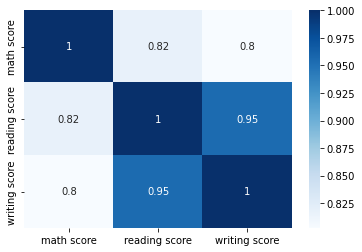

In [13]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

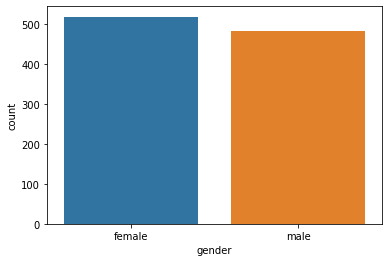

In [14]:
sns.countplot(x = 'gender',data = df)
plt.show()

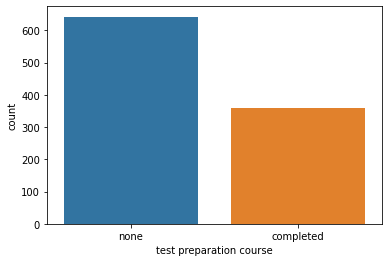

In [15]:
sns.countplot(x = 'test preparation course',data = df)
plt.show()

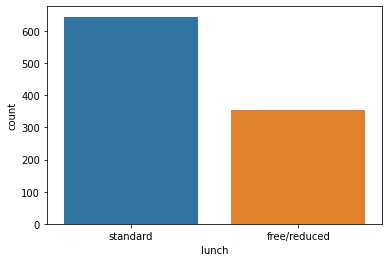

In [16]:
sns.countplot(x = 'lunch',data = df)
plt.show()

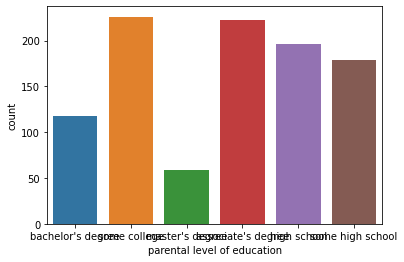

In [17]:
sns.countplot(x = 'parental level of education',data = df)
plt.show()

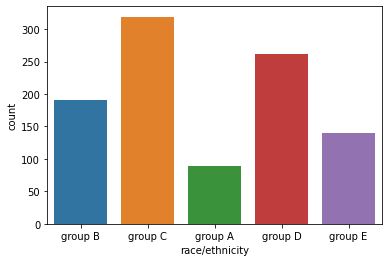

In [18]:
sns.countplot(x = 'race/ethnicity',data = df)
plt.show()

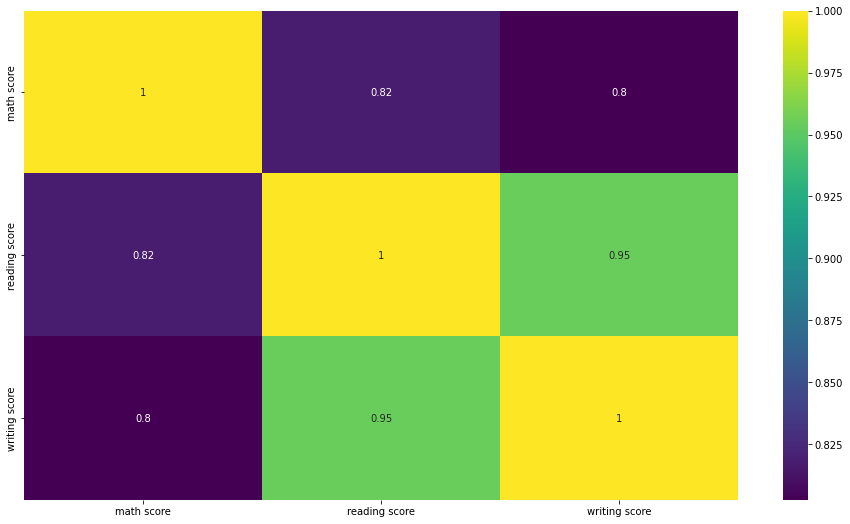

In [19]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

In [20]:
#Find the student with highest math percentage
max_math_percent = df['math score'].max()
max_math_percent

100

In [21]:
#Find the student with lowest math percentage
min_math_percent = df['math score'].min()
min_math_percent

0

In [22]:
#Find the student with highest reading score percentage
max_reading_percent = df['reading score'].max()
max_reading_percent

100

In [23]:
#Find the student with lowest reading score percentage
min_reading_percent = df['reading score'].min()
min_reading_percent

17

In [24]:
#Find the student with highest writing score percentage
max_writing_percent = df['writing score'].max()
max_writing_percent

100

In [25]:
#Find the student with lowest writing score percentage
min_writing_percent = df['writing score'].min()
min_writing_percent

10

In [26]:
#Find the students who gots equal percentage in all scores
df[(df['math score'].values == df['reading score']) & (df['math score'].values == df['writing score'])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
157,male,group B,some college,free/reduced,none,60,60,60
458,female,group E,bachelor's degree,standard,none,100,100,100
796,male,group D,high school,standard,none,70,70,70
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [27]:
df.corr()["math score"].sort_values()

writing score    0.802642
reading score    0.817580
math score       1.000000
Name: math score, dtype: float64

<Figure size 720x432 with 0 Axes>

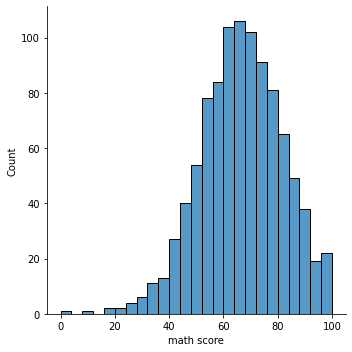

In [28]:
plt.figure(figsize=(10,6))
sns.displot(df["math score"])

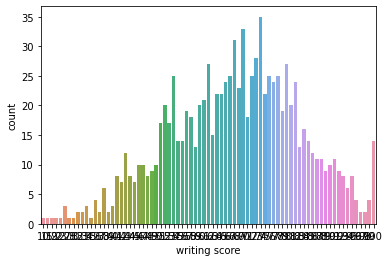

In [29]:
sns.countplot(df["writing score"])

In [30]:
df.sort_values('math score',ascending=False).head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
149,male,group E,associate's degree,free/reduced,completed,100,100,93
916,male,group E,bachelor's degree,standard,completed,100,100,100
263,female,group E,high school,standard,none,99,93,90
306,male,group E,some college,standard,completed,99,87,81
114,female,group E,bachelor's degree,standard,completed,99,100,100


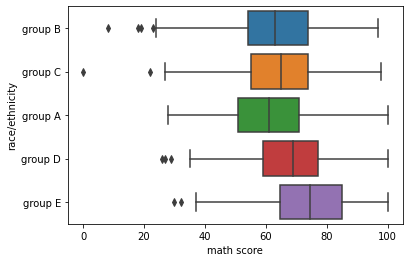

In [31]:
sns.boxplot(data=df,x='math score',y='race/ethnicity')

In [32]:
x=df.drop('math score',axis=1)
y=df['math score']


In [33]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [34]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()


In [37]:
x['gender']=le.fit_transform(x['gender'])
x['race/ethnicity']=le.fit_transform(x['race/ethnicity'])
x['parental level of education']=le.fit_transform(x['parental level of education'])
x['lunch']=le.fit_transform(x['lunch'])
x['test preparation course']=le.fit_transform(x['test preparation course'])

In [38]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,1,1,1,1,72,74
1,0,2,4,1,0,90,88
2,0,1,3,1,1,95,93
3,1,0,0,0,1,57,44
4,1,2,4,1,1,78,75
...,...,...,...,...,...,...,...
995,0,4,3,1,0,99,95
996,1,2,2,0,1,55,55
997,0,2,2,0,0,71,65
998,0,3,4,1,0,78,77


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=1)

In [41]:
ann=Sequential()

ann.add(Dense(units=7,activation='relu'))
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=5,activation='relu'))
ann.add(Dense(units=1))

ann.compile(optimizer='rmsprop',loss='mse')

In [42]:
ann.fit(xtrain,ytrain,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 4638.4453
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 4602.4609
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 4571.5093
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 4540.6792
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 4507.2617
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 4467.9072
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 4422.0674
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 4370.8789
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 4312.7280
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 4247.8516
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 4177.1040
Epoch 12/250
22/22 [==============================] - 0s 2ms/step - loss: 4098.5918
E

In [43]:
loss=pd.DataFrame(ann.history.history)

In [44]:
loss.head()

,loss
0,4638.445312
1,4602.460938
2,4571.509277
3,4540.679199
4,4507.261719


In [45]:
loss.tail()

,loss
245,30.056503
246,29.899536
247,29.828583
248,29.847595
249,29.939508


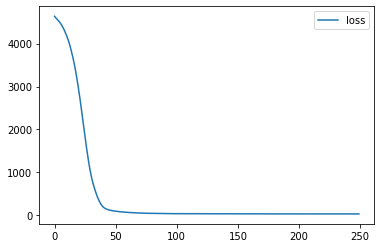

In [46]:
loss.plot()

In [47]:
ann.evaluate(xtrain,ytrain)

22/22 [==============================] - 0s 1ms/step - loss: 29.4427


29.442691802978516

In [48]:
ann.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 35.9481


35.94810104370117

In [49]:
ypred=ann.predict(xtest)

In [50]:
dic={"Actual Y":ytest , "Predicted Y":ypred.flatten()}

In [51]:
df1=pd.DataFrame(dic)

In [52]:
df1

,Actual Y,Predicted Y
507,55,59.788567
818,60,59.938694
452,65,63.830753
368,44,51.936440
242,56,46.548435
...,...,...
459,72,67.254494
415,84,80.032425
61,39,44.249954
347,77,83.679810


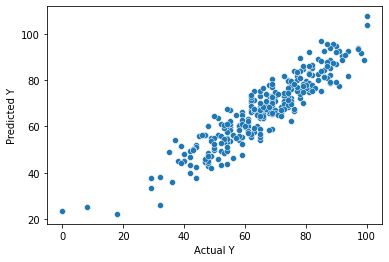

In [53]:
sns.scatterplot(x="Actual Y",y="Predicted Y",data=df1)
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
print(f'MSE :{mean_squared_error(ytest,ypred)}')
print(f'RMSE :{np.sqrt(mean_squared_error(ytest,ypred))}')
print(r2_score(ytest,ypred))

MSE :35.94810505646162
RMSE :5.995673861749121
0.8543915249878509


In [55]:
ann=Sequential()

ann.add(Dense(units=7,activation='relu'))
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=5,activation='relu'))
ann.add(Dense(units=1))

ann.compile(optimizer='rmsprop',loss='mse')

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [57]:
ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/300
22/22 [==============================] - 1s 7ms/step - loss: 4597.5610 - val_loss: 4575.7710
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 4576.2588 - val_loss: 4555.1221
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 4554.4780 - val_loss: 4532.3125
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 4529.9243 - val_loss: 4506.6245
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 4502.3608 - val_loss: 4477.1870
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 4470.3120 - val_loss: 4443.2979
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 4433.0366 - val_loss: 4403.3232
Epoch 8/300
22/22 [==============================] - 0s 4ms/step - loss: 4390.2891 - val_loss: 4357.6611
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 4342.2485 - val_loss: 4306.3677
Epoch 10/300
22/22 [==============================] - 0

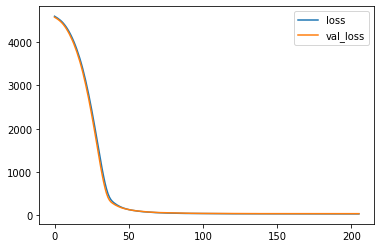

In [58]:
lossdf2=pd.DataFrame(ann.history.history)
lossdf2.plot()

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
print(f'MSE :{mean_squared_error(ytest,ypred)}')
print(f'RMSE :{np.sqrt(mean_squared_error(ytest,ypred))}')
print(r2_score(ytest,ypred))

MSE :35.94810505646162
RMSE :5.995673861749121
0.8543915249878509


In [60]:
#DropOut
from tensorflow.keras.layers import Dropout

In [61]:
ann=Sequential()

ann.add(Dense(units=7,activation='relu'))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=5,activation='relu'))
ann.add(Dropout(rate=0.5))


ann.add(Dense(units=1))

ann.compile(optimizer='adam',loss='mse')

In [62]:
ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/300
22/22 [==============================] - 1s 16ms/step - loss: 4604.1021 - val_loss: 4577.2896
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 4581.1885 - val_loss: 4559.5649
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 4565.6836 - val_loss: 4538.8086
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 4536.6313 - val_loss: 4514.1812
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 4520.7656 - val_loss: 4485.8867
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 4480.5566 - val_loss: 4451.6152
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 4442.3018 - val_loss: 4408.0205
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 4405.5283 - val_loss: 4358.2642
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 4357.7168 - val_loss: 4298.3955
Epoch 10/300
22/22 [==============================] - 

In [63]:
from sklearn.metrics import mean_squared_error,r2_score
print(f'MSE :{mean_squared_error(ytest,ypred)}')
print(f'RMSE :{np.sqrt(mean_squared_error(ytest,ypred))}')
print(r2_score(ytest,ypred))

MSE :35.94810505646162
RMSE :5.995673861749121
0.8543915249878509


In [65]:
from tensorflow.keras.models import load_model
ann.save('StudentsPerformance')

INFO:tensorflow:Assets written to: StudentsPerformance/assets
